In [92]:
#manipulasi data
import pandas as pd
import numpy as np

#visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#regression model (modeling)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
#load dataset
df = pd.read_csv("/content/sample_data/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [94]:
#mencari nilai kosong dan ternyata tidak ada nilai kosong pada data
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [95]:
#melihat info data seperti tipe data, dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [96]:
#untuk melihat statistik deskriptif dari data
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


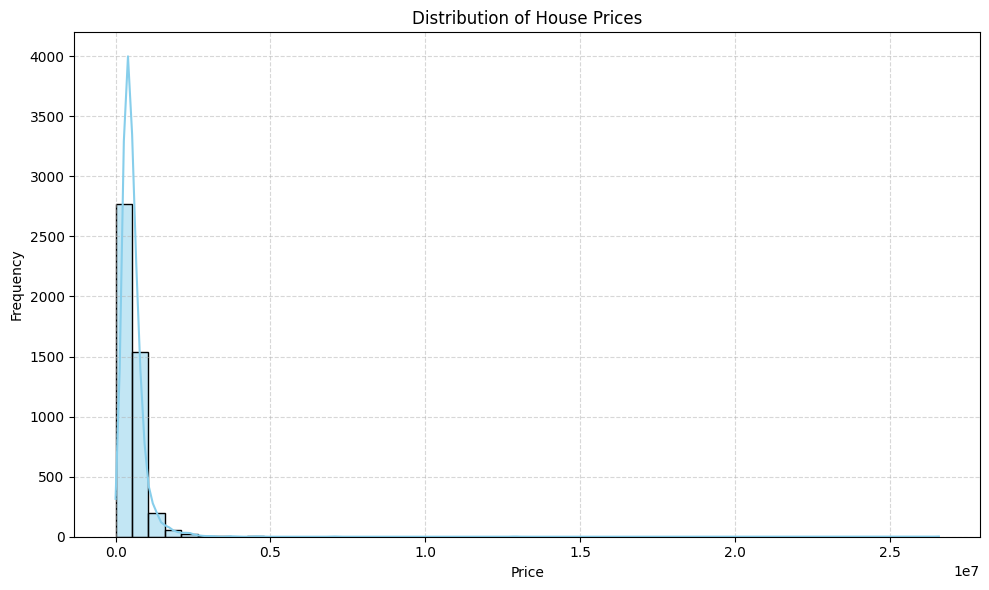

In [97]:
#visualisasi data
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-98-3072917266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='bedrooms', data=df, palette='pastel')


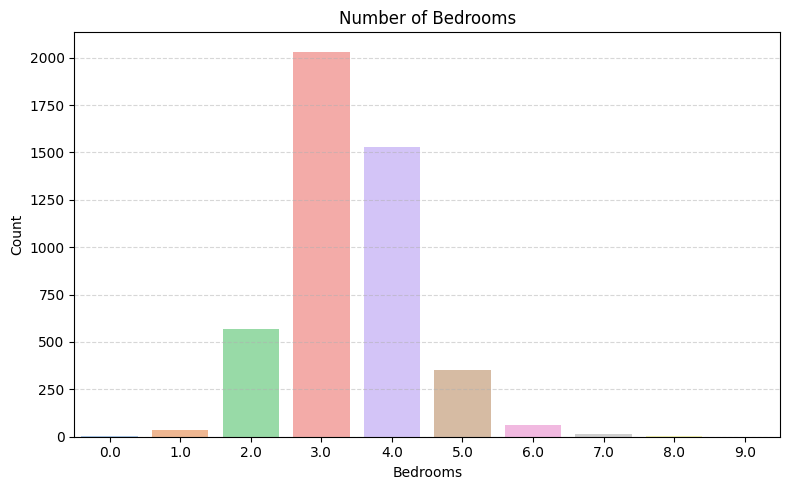

In [98]:
plt.figure(figsize=(8, 5))
sns.countplot(x ='bedrooms', data=df, palette='pastel')
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-99-141002140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=df, palette='pastel')


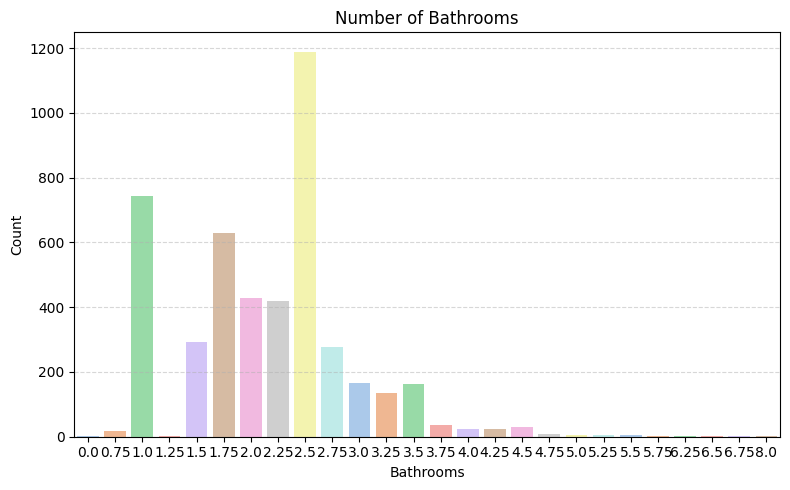

In [99]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bathrooms', data=df, palette='pastel')
plt.title("Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-100-1306753824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')


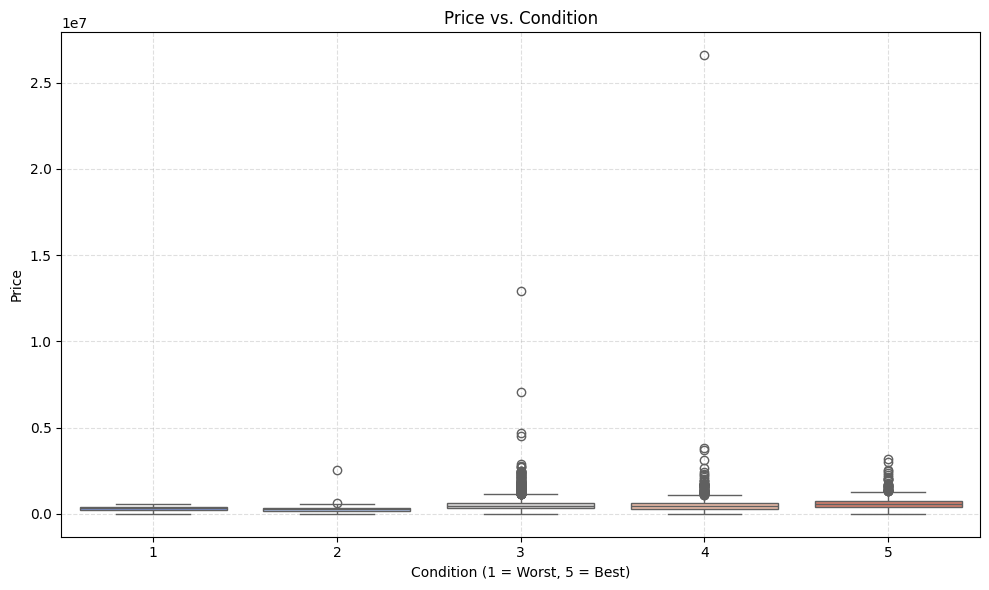

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

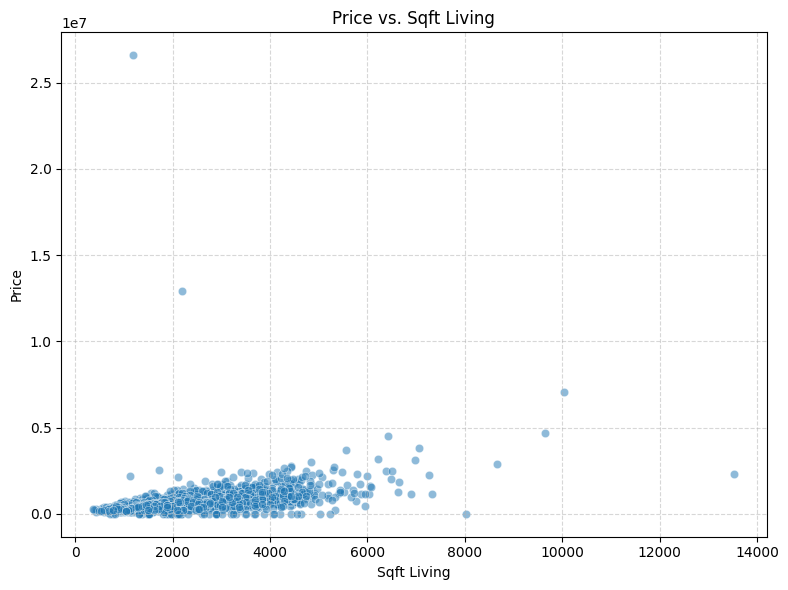

In [101]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-102-2219622949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")


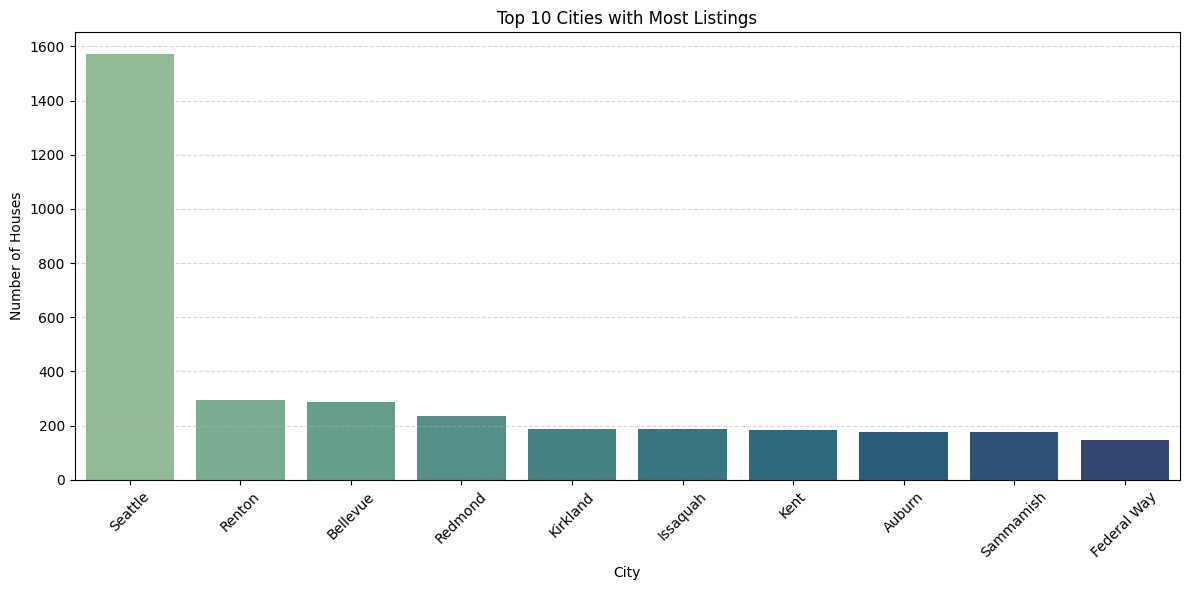

In [102]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

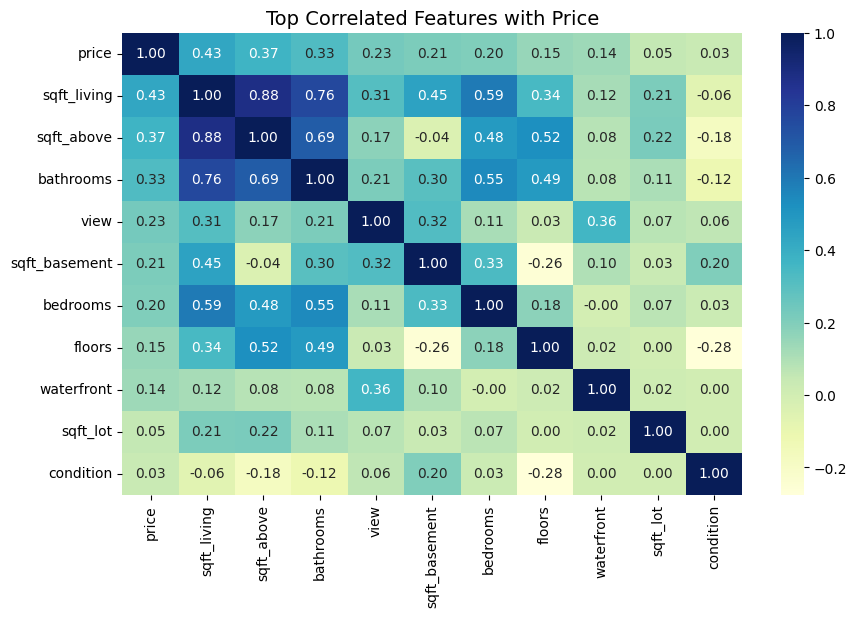

In [103]:
# Correlation matrix untuk kolom numerik
corr_matrix = df.corr(numeric_only=True)

# Top 10 fitur yang berkorelasi dengan harga (termasuk harga itu sendiri)
top_corr = corr_matrix['price'].abs().sort_values(ascending=False).head(11)

# Heatmap dari fitur
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Top Correlated Features with Price", fontsize=14)
plt.show()

In [104]:
# Function untuk menghaspus outlier dengan IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    #data yang sudah di filter
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Displaying initial shape of the dataset
print(f"Original dataset shape: {df.shape}")

# Columns to clean (based on domain knowledge and model requirements)
columns_to_clean = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 'sqft_lot']

# Removing outliers for each selected column
for col in columns_to_clean:
    original_shape = df.shape[0]  # Initial row count
    df = remove_outliers_iqr(df, col)  # Removing outliers
    new_shape = df.shape[0]  # Row count after outlier removal
    # Print how many outliers were removed
    print(f"Removed {original_shape - new_shape} outliers from '{col}' column.")

# Final shape after outlier removal
print(f"\nFinal dataset shape after outlier removal: {df.shape}")

# Summary of the cleaned data
print("\nCleaned Data Overview:")
print(df.describe())

Original dataset shape: (4600, 18)
Removed 240 outliers from 'price' column.
Removed 76 outliers from 'sqft_living' column.
Removed 53 outliers from 'bathrooms' column.
Removed 81 outliers from 'bedrooms' column.
Removed 63 outliers from 'sqft_above' column.
Removed 55 outliers from 'sqft_basement' column.
Removed 444 outliers from 'sqft_lot' column.

Final dataset shape after outlier removal: (3588, 18)

Cleaned Data Overview:
              price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  3.588000e+03  3588.000000  3588.000000  3588.000000   3588.000000   
mean   4.610013e+05     3.280100     2.018464  1881.248328   7086.753902   
std    2.018767e+05     0.779136     0.653626   647.754684   3406.775422   
min    0.000000e+00     2.000000     0.750000   580.000000    681.000000   
25%    3.080000e+05     3.000000     1.500000  1390.000000   4725.000000   
50%    4.300000e+05     3.000000     2.000000  1830.000000   7068.000000   
75%    5.800000e+05     4.000000    

In [105]:
# feature engineering membuat fitur baru

#tahun terjual
df['year_sold'] = pd.to_datetime(df['date']).dt.year

# usia rumah
df['house_age'] = df['year_sold'] - df['yr_built']

# binary dari renovasi rumah 1 jika >0 untuk yang sudah direnov dan lainnya untuk belum
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# menghapus kolom yang tidak digunakan
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# melihatkan dataframe yang baru
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


In [107]:
# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [108]:
# create model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# store the trained models here
trained_models = {}

# train each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
XGBoost trained successfully.


In [109]:
# Get the trained Linear Regression pipeline
lr_model = trained_models["Linear Regression"]

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Linear Regression Evaluation Metrics:")
print(f"MAE  = {mae_lr:.2f}")
print(f"RMSE = {rmse_lr:.2f}")
print(f"R²   = {r2_lr:.4f}")

Linear Regression Evaluation Metrics:
MAE  = 66894.08
RMSE = 104615.71
R²   = 0.7374


In [110]:
# Get the trained Decision Tree model
dt_model = trained_models["Decision Tree"]

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print("Decision Tree Regressor Evaluation Metrics:")
print(f"MAE  = {mae_dt:.2f}")
print(f"RMSE = {rmse_dt:.2f}")
print(f"R²   = {r2_dt:.4f}")

Decision Tree Regressor Evaluation Metrics:
MAE  = 100565.50
RMSE = 149387.33
R²   = 0.4645


In [111]:
# Get the trained Random Forest model
rf_model = trained_models["Random Forest"]

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest Regressor Evaluation Metrics:")
print(f"MAE  = {mae_rf:.2f}")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R²   = {r2_rf:.4f}")

Random Forest Regressor Evaluation Metrics:
MAE  = 77455.14
RMSE = 120017.94
R²   = 0.6544


In [112]:
# Get the trained Gradient Boosting model
gb_model = trained_models["Gradient Boosting"]

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Regressor Evaluation Metrics:")
print(f"MAE  = {mae_gb:.2f}")
print(f"RMSE = {rmse_gb:.2f}")
print(f"R²   = {r2_gb:.4f}")

Gradient Boosting Regressor Evaluation Metrics:
MAE  = 81955.89
RMSE = 120997.40
R²   = 0.6487


In [113]:
# Get the trained Gradient Boosting model
gb_model = trained_models["Gradient Boosting"]

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Regressor Evaluation Metrics:")
print(f"MAE  = {mae_gb:.2f}")
print(f"RMSE = {rmse_gb:.2f}")
print(f"R²   = {r2_gb:.4f}")

Gradient Boosting Regressor Evaluation Metrics:
MAE  = 81955.89
RMSE = 120997.40
R²   = 0.6487


In [114]:
# Get the trained XGBoost model
xgb_model = trained_models["XGBoost"]

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("XGBoost Regressor Evaluation Metrics:")
print(f"MAE  = {mae_xgb:.2f}")
print(f"RMSE = {rmse_xgb:.2f}")
print(f"R²   = {r2_xgb:.4f}")

XGBoost Regressor Evaluation Metrics:
MAE  = 71506.84
RMSE = 112382.09
R²   = 0.6969


In [115]:
# Create dictionary with raw scores
model_results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"],
    "MAE": [mae_lr, mae_dt, mae_rf, mae_gb, mae_xgb],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_gb, rmse_xgb],
    "R² Score": [r2_lr, r2_dt, r2_rf, r2_gb, r2_xgb]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Round values to 2 decimals
results_df[['MAE', 'RMSE', 'R² Score']] = results_df[['MAE', 'RMSE', 'R² Score']].round(2)

# Sort by RMSE (ascending = better model)
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)

# Show final table
results_df

,Model,MAE,RMSE,R² Score
0,Linear Regression,66894.08,104615.71,0.74
1,XGBoost,71506.84,112382.09,0.70
2,Random Forest,77455.14,120017.94,0.65
3,Gradient Boosting,81955.89,120997.40,0.65
4,Decision Tree,100565.50,149387.33,0.46
